In [1]:
import IPython
from PIL import Image
import tensorflow as tf

from stylizer.comixgan.generator_pretraining import preprocess_generator_input, postprocess_generator_output

In [2]:
tf.__version__

'2.0.0-rc0'

In [3]:
imported = tf.saved_model.load("./models/comixgan")

In [4]:
model = imported.signatures["serving_default"]

In [5]:
img = tf.image.decode_image(tf.io.read_file("./images/content_targets/katya.jpg"))

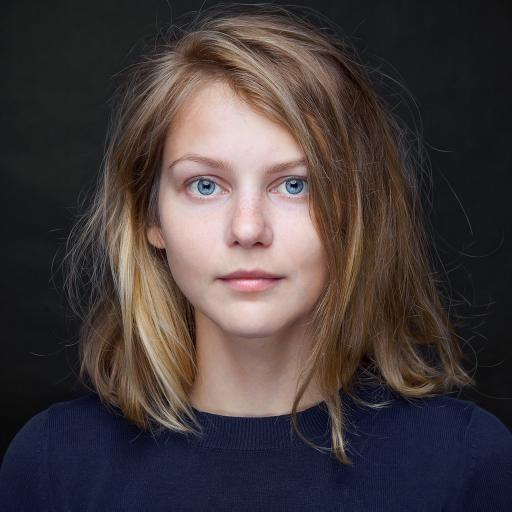

In [6]:
IPython.display.Image("./images/content_targets/katya.jpg")

In [7]:
img = preprocess_generator_input(tf.cast(img, tf.float32))

In [8]:
out = model(input_2=tf.expand_dims(img, 0))

In [9]:
out = postprocess_generator_output(out["conv2d_25"])

In [10]:
out = tf.cast(tf.round(out), tf.uint8)

In [11]:
Image.fromarray(out[0].numpy()).save("images/comixgan/results/katya.jpg")

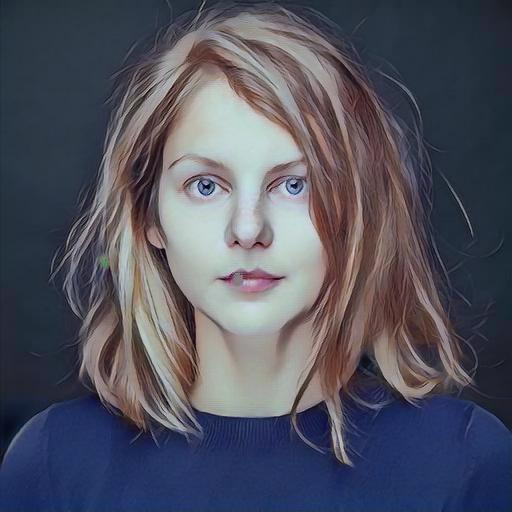

In [12]:
IPython.display.Image("images/comixgan/results/katya.jpg")